<a href="https://colab.research.google.com/github/DeepakRautella/google_collab/blob/main/optimization_in_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [3]:
df=pd.read_csv('/content/concertriccir2.csv')

In [4]:
df.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


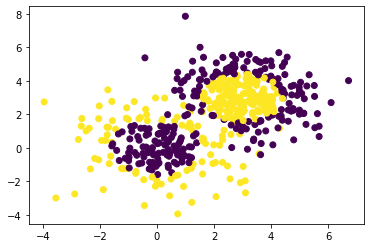

In [5]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [6]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [7]:
y.shape

(500,)

In [8]:
X.shape

(500, 2)

**Optimizers**

An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy.

**Gradient Optimizer/SGD (Stochastic Gradient Descent)**


In [9]:
model1=Sequential()
model1.add(Dense(10,input_dim=2,activation='relu'))
model1.add(Dense(5,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [10]:

model1.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
history1 = model1.fit(X,y,epochs=500,validation_split=0.2,callbacks=callback)

Epoch 1/500
13/13 [==============================] - 0s 7ms/step - loss: 0.5961 - accuracy: 0.7375 - val_loss: 0.5758 - val_accuracy: 0.7200
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 0.5953 - accuracy: 0.7300 - val_loss: 0.5740 - val_accuracy: 0.7200
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 0.5957 - accuracy: 0.7350 - val_loss: 0.5717 - val_accuracy: 0.7300
Epoch 4/500
13/13 [==============================] - 0s 5ms/step - loss: 0.5940 - accuracy: 0.7450 - val_loss: 0.5765 - val_accuracy: 0.7100
Epoch 5/500
13/13 [==============================] - 0s 5ms/step - loss: 0.5933 - accuracy: 0.7500 - val_loss: 0.5722 - val_accuracy: 0.7300
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 0.5915 - accuracy: 0.7500 - val_loss: 0.5672 - val_accuracy: 0.7500
Epoch 7/500
13/13 [==============================] - 0s 5ms/step - loss: 0.5911 - accuracy: 0.7500 - val_loss: 0.5617 - val_accuracy: 0.8000
Epoch 8/500
1

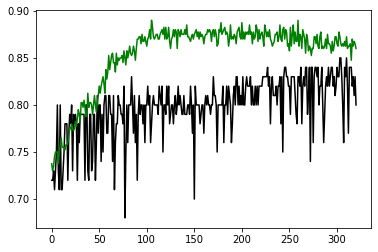

In [30]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history1.history['accuracy'],color='green')

**SGD with Momentum**

In [13]:
model2=Sequential()
model2.add(Dense(10,input_dim=2,activation='relu'))
model2.add(Dense(5,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                30        
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [14]:
opt=keras.optimizers.SGD(lr=0.01,momentum=0.6,nesterov=False)
model2.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [45]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
history2 = model2.fit(X,y,epochs=500,validation_split=0.2,callbacks=callback)

Epoch 1/500
13/13 [==============================] - 0s 7ms/step - loss: 0.2872 - accuracy: 0.8975 - val_loss: 0.4820 - val_accuracy: 0.7800
Epoch 2/500
13/13 [==============================] - 0s 6ms/step - loss: 0.2887 - accuracy: 0.8925 - val_loss: 0.4720 - val_accuracy: 0.8100
Epoch 3/500
13/13 [==============================] - 0s 10ms/step - loss: 0.2883 - accuracy: 0.9000 - val_loss: 0.4801 - val_accuracy: 0.8000
Epoch 4/500
13/13 [==============================] - 0s 8ms/step - loss: 0.2852 - accuracy: 0.9000 - val_loss: 0.4678 - val_accuracy: 0.7800
Epoch 5/500
13/13 [==============================] - 0s 9ms/step - loss: 0.2868 - accuracy: 0.8950 - val_loss: 0.4753 - val_accuracy: 0.8000
Epoch 6/500
13/13 [==============================] - 0s 10ms/step - loss: 0.2856 - accuracy: 0.9075 - val_loss: 0.4655 - val_accuracy: 0.8000
Epoch 7/500
13/13 [==============================] - 0s 8ms/step - loss: 0.2848 - accuracy: 0.9000 - val_loss: 0.4866 - val_accuracy: 0.7600
Epoch 8/500

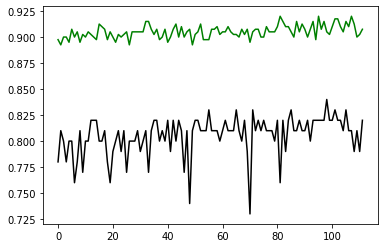

In [46]:
plt.plot(history2.history['val_accuracy'],color='black')
plt.plot(history2.history['accuracy'],color='green')

**SGD with momentum and nestrov(NAG)**

In [17]:
model3=Sequential()
model3.add(Dense(10,input_dim=2,activation='relu'))
model3.add(Dense(5,activation='relu'))
model3.add(Dense(1,activation='sigmoid'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                30        
                                                                 
 dense_7 (Dense)             (None, 5)                 55        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [51]:
opt=keras.optimizers.SGD(lr=0.01,momentum=0.8,nesterov=True)
model3.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
history3 = model3.fit(X,y,epochs=500,validation_split=0.2,callbacks=callback)

Epoch 1/500
13/13 [==============================] - 1s 15ms/step - loss: 0.2426 - accuracy: 0.9075 - val_loss: 0.6386 - val_accuracy: 0.6800
Epoch 2/500
13/13 [==============================] - 0s 6ms/step - loss: 0.2943 - accuracy: 0.8800 - val_loss: 0.4003 - val_accuracy: 0.8600
Epoch 3/500
13/13 [==============================] - 0s 22ms/step - loss: 0.2468 - accuracy: 0.8975 - val_loss: 0.4216 - val_accuracy: 0.8500
Epoch 4/500
13/13 [==============================] - 0s 6ms/step - loss: 0.2434 - accuracy: 0.9025 - val_loss: 0.6476 - val_accuracy: 0.6600
Epoch 5/500
13/13 [==============================] - 0s 6ms/step - loss: 0.2583 - accuracy: 0.8875 - val_loss: 0.5972 - val_accuracy: 0.7100
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 0.2634 - accuracy: 0.8900 - val_loss: 0.4607 - val_accuracy: 0.8300
Epoch 7/500
13/13 [==============================] - 0s 5ms/step - loss: 0.2381 - accuracy: 0.9125 - val_loss: 0.3840 - val_accuracy: 0.8400
Epoch 8/500

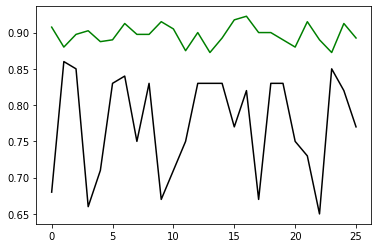

In [53]:
plt.plot(history3.history['val_accuracy'],color='black')
plt.plot(history3.history['accuracy'],color='green')

**Adagrad** 

Adaptive Gradient Algorithm (Adagrad) is an algorithm for gradient-based optimization. The learning rate is adapted component-wise to the parameters by incorporating knowledge of past observations.

AdaGrad decays the learning rate very aggressively (as the denominator grows). As a result, after a while, the frequent parameters will start receiving very small updates because of the decayed learning rate. To avoid this why not decay the denominator and prevent its rapid growth.


In [54]:
model4=Sequential()
model4.add(Dense(10,input_dim=2,activation='relu'))
model4.add(Dense(5,activation='relu'))
model4.add(Dense(1,activation='sigmoid'))
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                30        
                                                                 
 dense_16 (Dense)            (None, 5)                 55        
                                                                 
 dense_17 (Dense)            (None, 1)                 6         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [55]:
opt=keras.optimizers.Adagrad(lr=0.1)
model4.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adagrad.py:77: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


In [56]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
history4 = model4.fit(X,y,epochs=500,validation_split=0.2,callbacks=callback)

Epoch 1/500
13/13 [==============================] - 1s 17ms/step - loss: 0.7093 - accuracy: 0.5325 - val_loss: 0.6883 - val_accuracy: 0.5900
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 0.6865 - accuracy: 0.5550 - val_loss: 0.6744 - val_accuracy: 0.5700
Epoch 3/500
13/13 [==============================] - 0s 6ms/step - loss: 0.6750 - accuracy: 0.5950 - val_loss: 0.6693 - val_accuracy: 0.5700
Epoch 4/500
13/13 [==============================] - 0s 6ms/step - loss: 0.6792 - accuracy: 0.5900 - val_loss: 0.6898 - val_accuracy: 0.5600
Epoch 5/500
13/13 [==============================] - 0s 5ms/step - loss: 0.6683 - accuracy: 0.5825 - val_loss: 0.7009 - val_accuracy: 0.5300
Epoch 6/500
13/13 [==============================] - 0s 6ms/step - loss: 0.6593 - accuracy: 0.6250 - val_loss: 0.6484 - val_accuracy: 0.7300
Epoch 7/500
13/13 [==============================] - 0s 6ms/step - loss: 0.6570 - accuracy: 0.6150 - val_loss: 0.6706 - val_accuracy: 0.6000
Epoch 8/500


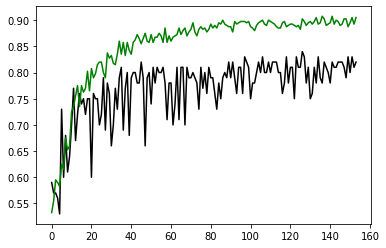

In [57]:
plt.plot(history4.history['val_accuracy'],color='black')
plt.plot(history4.history['accuracy'],color='green')

**RMSProp**

RMSprop deals with the above ada grad disadvantage by using a moving average of squared gradients to normalize the gradient. This normalization balances the step size (momentum), decreasing the step for large gradients to avoid exploding, and increasing the step for small gradients to avoid vanishing.

In [25]:
model5=Sequential()
model5.add(Dense(10,input_dim=2,activation='relu'))
model5.add(Dense(5,activation='relu'))
model5.add(Dense(1,activation='sigmoid'))
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                30        
                                                                 
 dense_13 (Dense)            (None, 5)                 55        
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [39]:
opt=keras.optimizers.RMSprop(lr=0.001,rho=0.9,momentum=0.0)
model5.compile(optimizer=opt,metrics=['accuracy'],loss='binary_crossentropy')

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [58]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
history5 = model5.fit(X,y,epochs=500,validation_split=0.2,callbacks=callback)

Epoch 1/500
13/13 [==============================] - 0s 14ms/step - loss: 0.1903 - accuracy: 0.9400 - val_loss: 0.4239 - val_accuracy: 0.8200
Epoch 2/500
13/13 [==============================] - 0s 10ms/step - loss: 0.1897 - accuracy: 0.9425 - val_loss: 0.4210 - val_accuracy: 0.8400
Epoch 3/500
13/13 [==============================] - 0s 10ms/step - loss: 0.1892 - accuracy: 0.9450 - val_loss: 0.4247 - val_accuracy: 0.8200
Epoch 4/500
13/13 [==============================] - 0s 13ms/step - loss: 0.1895 - accuracy: 0.9375 - val_loss: 0.4229 - val_accuracy: 0.8400
Epoch 5/500
13/13 [==============================] - 0s 9ms/step - loss: 0.1894 - accuracy: 0.9475 - val_loss: 0.4217 - val_accuracy: 0.8400
Epoch 6/500
13/13 [==============================] - 0s 12ms/step - loss: 0.1890 - accuracy: 0.9450 - val_loss: 0.4194 - val_accuracy: 0.8400
Epoch 7/500
13/13 [==============================] - 0s 9ms/step - loss: 0.1898 - accuracy: 0.9450 - val_loss: 0.4239 - val_accuracy: 0.8400
Epoch 8/

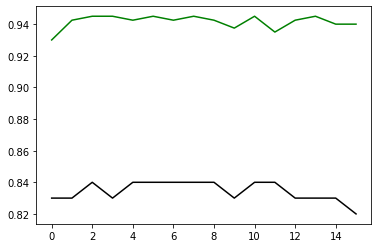

In [41]:
plt.plot(history5.history['val_accuracy'],color='black')
plt.plot(history5.history['accuracy'],color='green')

**Adam**

Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.

Adam can be looked at as a combination of RMSprop and Stochastic Gradient Descent with momentum. It uses the squared gradients to scale the learning rate like RMSprop and it takes advantage of momentum by using moving average of the gradient instead of gradient itself like SGD with momentum. Let’s take a closer look at how it works.

In [59]:
model6=Sequential()
model6.add(Dense(10,input_dim=2,activation='relu'))
model6.add(Dense(5,activation='relu'))
model6.add(Dense(1,activation='sigmoid'))
model6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                30        
                                                                 
 dense_19 (Dense)            (None, 5)                 55        
                                                                 
 dense_20 (Dense)            (None, 1)                 6         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [64]:
opt=keras.optimizers.Adam(lr=0.001)
model6.compile(optimizer=opt,metrics=['accuracy'],loss='binary_crossentropy')

In [65]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
history6 = model6.fit(X,y,epochs=500,validation_split=0.2,callbacks=callback)

Epoch 1/500
13/13 [==============================] - 1s 14ms/step - loss: 0.6834 - accuracy: 0.5700 - val_loss: 0.7405 - val_accuracy: 0.5500
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 0.6762 - accuracy: 0.5950 - val_loss: 0.7302 - val_accuracy: 0.5500
Epoch 3/500
13/13 [==============================] - 0s 6ms/step - loss: 0.6713 - accuracy: 0.6225 - val_loss: 0.7168 - val_accuracy: 0.6200
Epoch 4/500
13/13 [==============================] - 0s 6ms/step - loss: 0.6655 - accuracy: 0.6375 - val_loss: 0.7073 - val_accuracy: 0.6100
Epoch 5/500
13/13 [==============================] - 0s 6ms/step - loss: 0.6611 - accuracy: 0.6400 - val_loss: 0.7004 - val_accuracy: 0.6400
Epoch 6/500
13/13 [==============================] - 0s 6ms/step - loss: 0.6566 - accuracy: 0.6550 - val_loss: 0.6962 - val_accuracy: 0.6600
Epoch 7/500
13/13 [==============================] - 0s 4ms/step - loss: 0.6528 - accuracy: 0.6725 - val_loss: 0.6924 - val_accuracy: 0.6700
Epoch 8/500


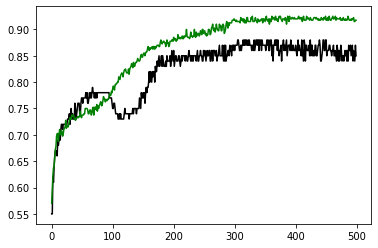

In [66]:
plt.plot(history6.history['val_accuracy'],color='black')
plt.plot(history6.history['accuracy'],color='green')